# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

sns.set_style("whitegrid")

# Multi-armed bandit

In [2]:
class UniformMultiArmedBandit:

    class Arm:

        def __init__(self, cost, distribution):
            self.cost = cost
            self.distribution = distribution

        def trigger(self):
            return self.distribution.rvs(1)[0] - self.cost

    def __init__(self, n_arms, costs = None, distributions = None):

        if not (distributions is None):
            assert len(distributions) == n_arms, "Distributions size should be equal to n_arms"
        else: 
            a_list = np.random.randint(1, 5, n_arms)
            b_list = np.random.randint(6, 10, n_arms)
            distributions = [stats.randint(a, b) for a, b in zip(a_list, b_list)]
        
        if not (costs is None):
            assert len(costs) == n_arms, "Costs size should be equal to n_arms"
        else:
            costs = np.random.randint(3, 8, n_arms)

        self.n_arms = n_arms

        self.arms = []
        for i in range(n_arms):
            new_arm = self.Arm(costs[i], distributions[i])
            self.arms.append(new_arm)
        
    def trigger(self, idx):
        return self.arms[idx].trigger()

# SoftMax with Temperature

In [3]:
from scipy.special import softmax

In [4]:
n_arms = 4
bandit = UniformMultiArmedBandit(n_arms)

In [19]:
def softmax_policy_with_temperature(rewards, temperature=1):
    means = []
    # mean for each action
    for rew_list in rewards:
        means.append(np.mean(rew_list))
    
    means = np.array(means)
    means = means / temperature
     
    return softmax(means)

In [20]:
def softmax_policy(rewards):
    means = []
    # mean for each action
    for rew_list in rewards:
        means.append(np.mean(rew_list))
     
    return softmax(means)

In [60]:
rewards = [[bandit.trigger(i)] for i in range(n_arms)]

In [61]:
softmax_policy(rewards)

array([0.04031637, 0.80977599, 0.10959126, 0.04031637])

In [62]:
softmax_policy_with_temperature(rewards, temperature=2)

array([0.12299502, 0.55122545, 0.20278451, 0.12299502])

In [63]:
# mean reward for each arm
actual_means = [arm.distribution.mean() - arm.cost for arm in bandit.arms]
# max mean reward
real_max_exp = max(actual_means)

estimated_mean_policy = []
real_mean_policy = []

N = 200

for i in range(N):
    # choosing an action
    temperature = 11 - 0.1 * i
    if temperature < 0.1:
        temperature = 0.1
    action_probas = softmax_policy_with_temperature(rewards, temperature=temperature)
    action = np.random.choice(n_arms, size = 1, p = action_probas)[0]

    # recording the results
    estimated_mean_policy.append(np.mean(rewards[action]))
    rewards[action].append(bandit.trigger(action))
    real_mean_policy.append((actual_means * action_probas).sum())

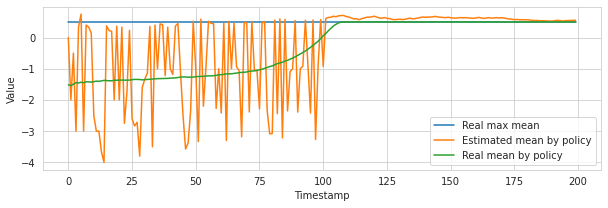

In [64]:
plt.figure(figsize = (10, 3))#, dpi = 300)
plt.plot(np.arange(N), [real_max_exp] * N)
plt.plot(np.arange(N), estimated_mean_policy)
plt.plot(np.arange(N), real_mean_policy)
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend(['Real max mean', 'Estimated mean by policy', 'Real mean by policy'])
plt.show()

Using Softmax with temperature policy we can regulate Exploration and Exploitation. At first we can apply high temperature to try to explore the best stratgies, and then decrease temperature to exploit the best found strategy.